### MISY408 - Project 6 (Decision Tree)

### Customer Churn Dataset

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction. In this project, you're going to use decision tree algorithm to classifiy customers into two groups: Customers who closed their account(1) and Customers who did not close their account(0).

**Attributes**

**CustomerId:** Unique identifier for the customer holding the account

**Surname:** Customer's last name

**CreditScore:** Customer's credir score

**Geography:** Customer's country of residence

**Gender:** M=Male, F=Female

**Age:** Customer's Age in Years

**Tenure:** Period of relationship with bank

**Balance:** Customer's credit card balance

**NumOfProducts:** Total number of products held by the customer

**IsActiveMember:** 1=Active member, 0=Inactive member

**EstimatedSalary:** The customer's estimated salary

**Exited:** 0= the customer did not close the account, 1= the customer closed the account


**Question1: Import the required libraries and read creditcard.csv file and save it in df dataframe, display the first 5 rows of df dataframe**

In [30]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


**Question 2: Exploratory data analysis.**

    a. Check the shape of dataset

In [31]:
df.shape

(10000, 13)

    b. Show the statistical summary of numerical variables (use describe method)

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


**Question 3:** 

    a. Create a frequency table to show the number of customers who closed their account and the number of customers who did not close their account

In [33]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

    b. In the following, interpret the above frequency table's output.

There are 7963 people that haven't closed their account and 2037 people have closed their account

    c. Create a crosstab to show the number of customers who closed their account  and the number of customers who did not close their account  for each Gender. (Put Exited as the first parameter and Gender as the second parameter).

In [34]:
pd.crosstab(df['Exited'], df['Gender'])

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


    d. In the following, interperet the above crosstab's output.

According to the crosstab: 1139 females and 898 males closed their account. Also, there were 3404 females and 4559 males that did not close their account.

    e. In the following show average CreditScore and average Balance for the customers who closed their account and for the customers who did not close their account. (you should have only one table in the output)

In [35]:
avg = df[['Exited', 'CreditScore', 'Balance']].copy()
avg.groupby(['Exited']).mean()

,CreditScore,Balance
Exited,,
0,651.853196,72745.296779
1,645.351497,91108.539337


    f. In the following, interpret the above output. What do you conclude from the above output?

The average credit score for open accounts is about 651.85. The average Balance for open accounts is 72745.29.
The average credit score for closed accounts is about 645.35. The average Balance for closed accounts is about 91108.54.

People who have their accounts open have a higher credit score and a lower balance. Those that have their accounts closed have a slightly lower credit score and a much greater balance.

**Question 4:**

a. Set X variable to 'CreditScore' and 'Balance' and Y variable to 'Exited'.

In [36]:
y = df['Exited']
x = df[['CreditScore','Balance']]

b. Create a Decision Tree

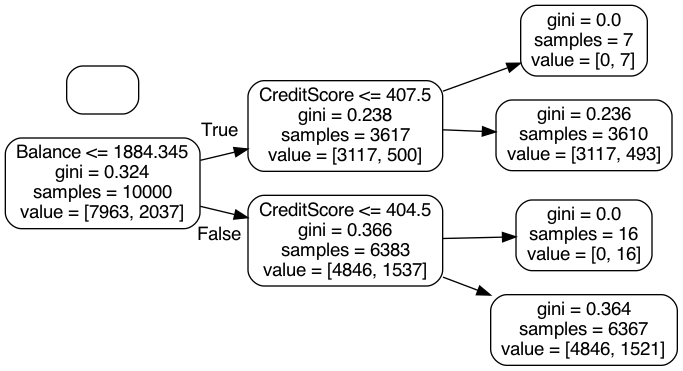

In [37]:
from sklearn import tree
clf= tree.DecisionTreeClassifier(max_depth=2, random_state = 0)
clf= clf.fit(x, y)

from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  feature_names=X.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

c. Interpet the decision tree (all nodes) in the following cell. (you should mention the numbers of each node in your interpretation so that I can compare them with decision tree and grade them.)

There are 7963 people out of a total of 10,000 that ended up closing their account while 2037 did not.


1st Path:

Out of all customers that had a balance less than or equal to 1884.345, 3117 of them did not close their account while 500 of them chose to close it.  

Out of all customers that had a balance less than or equal to 1884.345 and had a credit score less than or equal to 407.5, all 7 of them chose to close it. 

Out of all customers that had a balance less than or equal to 1884.345 and had a credit score greater than 407.5, 3117 of them did not close their account while 493 of them chose to close it.  

2nd Path:

Out of all customers that had a balance greater than 1884.345, 4846 did not close their account and 1537 did

Out of all customers that had a balance greater than 1884.345 and a credit score of less than or equal to 404.5, the 16 individuals chose to close their account.

Out of all customers that have a balance of greater than 1884.345 and a credit score of greater than 404.5, the 4846 individuals did not close their account while 1521 chose to close it.



d. Based on Gini score which node has the best classification (has lower impurity)?

If the balance is greater than 1884.345, and the credit score is lower than 404.5, then the gini would be a 0. Also, if the balance is less than 1884.345 and you have a credit score less than 407.5, the gini would be a 0. Both of them can be found in the 3rd column in the decision tree. The nodes 4 and 6

**Question 5:**

a. In the following, type a code to show the importance of each feature. 

In [38]:
clf.feature_importances_

array([0.37311768, 0.62688232])

b. In the following, Interpret the feature importance output (you should interpret both numbers)

The array above tells us that the customer's credit card balance matters more than the credit score. The results show that 37.31% accounted for importance of credit score and about 62.69% accounted for the importance of balance. Balance is more important than credit score.

**Question6:**

a. In the following, type a code to create a confusion matrix

In [39]:
predictions= clf.predict(X)
from sklearn.metrics import confusion_matrix
# suggestion: put ACTUAL value first, predictions second.
cm = confusion_matrix(y, predictions)
cm

array([[7963,    0],
       [2014,   23]])

b. In the following, Interpret the confusion matrix

True Negative: of the people who did not close their accounts, we predicted 7963 correctly. 
True Positive: of the people that closed their accounts, we predicted 23 correctly.

False Positive: of the people that did not close their accounts, we predicted 0 incorrectly.
False Negative: of the people who did close their accounts, we predicted 2014 to not close their accounts.



**Question 7: In the following, type a code to show the accuracy of your model**

In [40]:
accuracy = clf.score(X,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 79.86% accurate.
